<a href="https://colab.research.google.com/github/CoderBose/network-security-white-labelling/blob/main/image_comparison/NetSecProj_Image_Comparison_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import os
from PIL import Image
from scipy. cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16

In [ ]:
base_model1 = ResNet50(weights='imagenet', include_top=False, pooling='avg')
base_model2 = MobileNetV2(weights='imagenet', include_top=False)
base_model3 = VGG16(weights='imagenet', include_top=False)

In [ ]:
def extract_features_base_model_1 (img_path):
  img = Image.open(img_path)
  img = img.resize((224, 224))
  img_array = np.array(img)
  img_array = preprocess_input(img_array)
  img_array = np.expand_dims(img_array, axis=0)
  features = base_model1.predict(img_array)
  return features.flatten()

In [ ]:
def extract_features_base_model_2 (img_path):
  img = Image.open(img_path)
  img = img.resize((224, 224))
  img_array = np.array(img)
  img_array = preprocess_input(img_array)
  img_array = np.expand_dims(img_array, axis=0)
  features = base_model2.predict(img_array)
  return features.flatten()

In [ ]:
def extract_features_base_model_3 (img_path):
  img = Image.open(img_path)
  img = img.resize((224, 224))
  img_array = np.array(img)
  img_array = preprocess_input(img_array)
  img_array = np.expand_dims(img_array, axis=0)
  features = base_model3.predict(img_array)
  return features.flatten()

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

In [ ]:
# Specify the path to your images folder
smart_plug_path = '/content/gdrive/MyDrive/NET_SEC_WHITE_LABEL/IMAGES/Amazon/Smart Wifi Plug'
smart_camera_path = '/content/gdrive/MyDrive/NET_SEC_WHITE_LABEL/IMAGES/Amazon/Smart Camera'
smart_blood_pressure_monitor_path = '/content/gdrive/MyDrive/NET_SEC_WHITE_LABEL/IMAGES/Amazon/Smart Blood Pressure Monitors'
images_folder_path = smart_blood_pressure_monitor_path
# Shared with me > NET_SEC_WHITE_LABEL > IMAGES > Amazon > Smart Wifi Plug

# Change the current working directory to the images folder
os.chdir(images_folder_path)

# Change the current working directory to the images folder
os.chdir(images_folder_path)

# Specify the number of images you want to read (e.g., 50 in this case) - original folder has 391 images
num_images = 300

image_paths = [os.path.join(images_folder_path, img) for img in sorted(os.listdir(images_folder_path))[:num_images] if img.endswith(('png', 'jpg', 'jpeg'))]

In [ ]:
# images_dir = "/content/downloaded_images"
# image_paths = [os.path.join(images_dir, img) for img in sorted(os.listdir(images_dir))[0:50] if img.endswith(('png', 'jpg', 'jpeg'))]
# image_paths

In [ ]:
print("Extracting features from ResNet50")
# Extract features from each image
feature_matrix1 = np.array([extract_features_base_model_1(img_path) for img_path in image_paths])

Extracting features from ResNet50
1/1 [==============================] - 0s 302ms/step


In [ ]:
print("Extracting features from MobileNetV2")
# Extract features from each image
feature_matrix2 = np.array([extract_features_base_model_2(img_path) for img_path in image_paths])

Extracting features from MobileNetV2
1/1 [==============================] - 0s 52ms/step


In [ ]:
print("Extracting features from VGG16")
# Extract features from each image
feature_matrix3 = np.array([extract_features_base_model_3(img_path) for img_path in image_paths])

Extracting features from VGG16
1/1 [==============================] - 1s 535ms/step


In [ ]:
print ("Computing sim scores for ResNet50")
# pairwise cosine similarity
similarity_matrix1 = cosine_similarity(feature_matrix1)

Computing sim scores for ResNet50


In [ ]:
print ("Computing sim scores for MobileNetV2")
# pairwise cosine similarity
similarity_matrix2 = cosine_similarity(feature_matrix2)

Computing sim scores for MobileNetV2


In [ ]:
print ("Computing sim scores for VGG16")
# pairwise cosine similarity
similarity_matrix3 = cosine_similarity(feature_matrix3)

Computing sim scores for VGG16


In [ ]:
# plt.figure(figsize=(10, 8))
# plt.imshow(similarity_matrix1, cmap='autumn', interpolation='nearest')
# plt.colorbar(label=' Cosine Similarity')
# plt.xticks(np.arange(len (image_paths)), [os. path. splitext (os. path. basename (path)) [0] for path in image_paths], rotation='vertical')
# plt.yticks(np.arange (len (image_paths)), [os. path. splitext(os. path.basename (path)) [0] for path in image_paths])
# plt.title('Similarity Matrix Heatmap')
# plt.show()

In [ ]:
# plt.figure(figsize=(10, 8))
# plt.imshow(similarity_matrix2, cmap='autumn', interpolation='nearest')
# plt.colorbar(label=' Cosine Similarity')
# plt.xticks(np.arange(len (image_paths)), [os. path. splitext (os. path. basename (path)) [0] for path in image_paths], rotation='vertical')
# plt.yticks(np.arange (len (image_paths)), [os. path. splitext(os. path.basename (path)) [0] for path in image_paths])
# plt.title('Similarity Matrix Heatmap')
# plt.show()

In [ ]:
linkage_matrix1 = linkage(similarity_matrix1, method='average')

In [ ]:
linkage_matrix2 = linkage(similarity_matrix2, method='average')

In [ ]:
linkage_matrix3 = linkage(similarity_matrix3, method='average')

In [ ]:
# Plot dendrogram with image names as labels
plt.figure(figsize=(100,100))
dendrogram(linkage_matrix1, labels=[os.path.splitext(os. path. basename (path)) [0] for path in image_paths], orientation='left')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance between clusters')
plt.show()

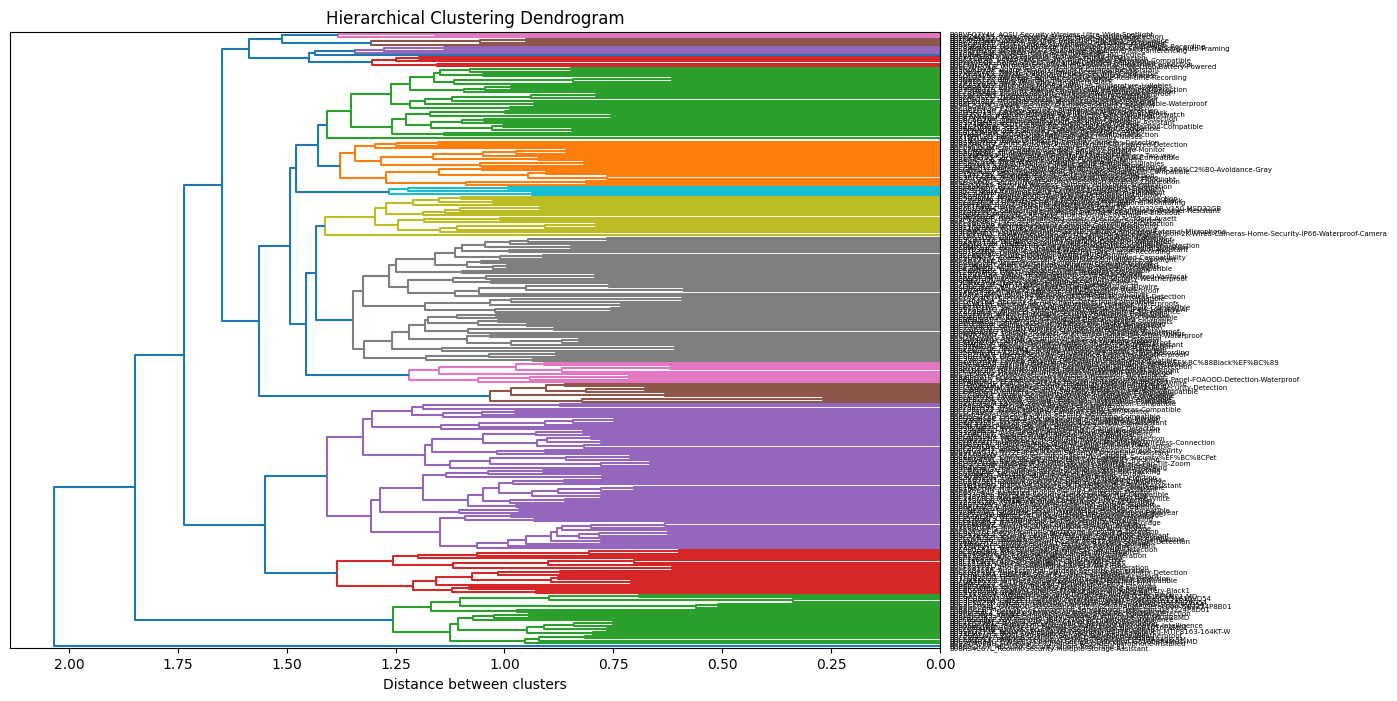

In [ ]:
# Plot dendrogram with image names as labels
plt.figure(figsize=(12,8))
dendrogram(linkage_matrix2, labels=[os.path.splitext(os. path. basename (path)) [0] for path in image_paths], orientation='left')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance between clusters')
plt.show()

In [ ]:
# 2 test cases

# two similar images -- white labelled
# two different images

# plt.imshow(plt.imread('/content/downloaded_images/B0B5G6MDQ6_Protector-POWSAV-Outlets-Always-Extension.jpg'))
# plt.imshow(plt.imread('/content/downloaded_images/B0B9N9MTWN_GNCC-Compatible-SmartThings-Smartlife-GSP01.jpg'))
# plt.imshow(plt.imread('/content/downloaded_images/B0B33R523C_Shelly-Automation-Product-shutters-required.jpg'))

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Choose the appropriate distance threshold
distance_threshold = 0.5  # Adjust this based on your dendrogram visualization

# Cut the dendrogram to get clusters
cluster1 = fcluster(linkage_matrix1, distance_threshold, criterion='distance')
cluster2 = fcluster(linkage_matrix2, 0.8, criterion='distance')
cluster3 = fcluster(linkage_matrix3, distance_threshold, criterion='distance')

# Display the number of unique clusters
num_clusters1 = len(np.unique(cluster1))
num_clusters2 = len(np.unique(cluster2))
num_clusters3 = len(np.unique(cluster3))
print(f'Number of clusters from the ResNet Model: {num_clusters1}')
print(f'Number of clusters from the MobileNetV2 Model: {num_clusters2}')
print(f'Number of clusters from the VGG16 Model: {num_clusters3}')

Number of clusters from the ResNet Model: 192
Number of clusters from the MobileNetV2 Model: 202
Number of clusters from the VGG16 Model: 216


In [ ]:
from collections import Counter

# Count occurrences of each cluster 1 label
cluster_counts = Counter(cluster2)

# Print the length of each cluster
for cluster_label, count in cluster_counts.items():
    print(f'Cluster {cluster_label}: {count} images')

Cluster 96: 1 images
Cluster 152: 1 images
Cluster 192: 1 images
Cluster 89: 1 images
Cluster 51: 1 images
Cluster 105: 1 images
Cluster 142: 1 images
Cluster 94: 1 images
Cluster 184: 1 images
Cluster 64: 2 images
Cluster 112: 1 images
Cluster 193: 1 images
Cluster 41: 1 images
Cluster 115: 1 images
Cluster 75: 2 images
Cluster 87: 1 images
Cluster 81: 1 images
Cluster 80: 2 images
Cluster 168: 1 images
Cluster 106: 1 images
Cluster 65: 1 images
Cluster 164: 1 images
Cluster 199: 1 images
Cluster 93: 1 images
Cluster 79: 1 images
Cluster 52: 1 images
Cluster 42: 1 images
Cluster 148: 1 images
Cluster 146: 1 images
Cluster 190: 1 images
Cluster 103: 1 images
Cluster 39: 1 images
Cluster 114: 1 images
Cluster 68: 4 images
Cluster 48: 1 images
Cluster 98: 1 images
Cluster 35: 1 images
Cluster 85: 1 images
Cluster 155: 1 images
Cluster 178: 1 images
Cluster 86: 1 images
Cluster 117: 1 images
Cluster 118: 1 images
Cluster 60: 1 images
Cluster 119: 1 images
Cluster 160: 1 images
Cluster 97:

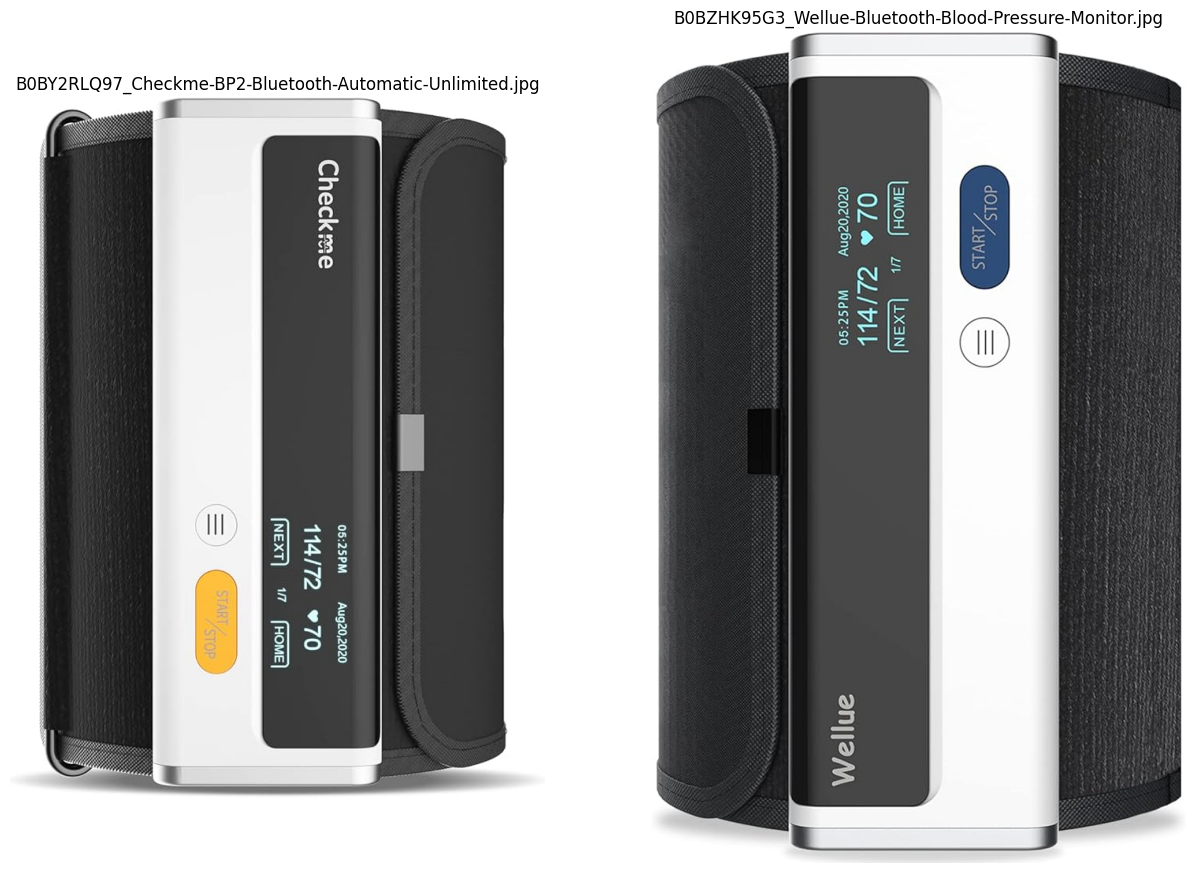

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Function to display example images from a cluster
def display_cluster_images(cluster_number, num_images=5):
    cluster_indices = np.where(cluster1 == cluster_number)[0]

    plt.figure(figsize=(40, 3 * num_images))
    # change the next range to display all images of the cluster
    for i, index in enumerate(cluster_indices[:num_images]):
        plt.subplot(1, num_images, i + 1)
        image = cv2.imread(image_paths[index])
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(os.path.basename(image_paths[index]))
        plt.axis('off')

    plt.show()

# Display example images from the first cluster
# 21, 45, 88
selected_cluster = 164  # Choose the cluster number you want to display
display_cluster_images(selected_cluster)

In [ ]:
from collections import Counter

# Count occurrences of each cluster 2 label
cluster_counts = Counter(cluster2)

# Print the length of each cluster
for cluster_label, count in cluster_counts.items():
    print(f'Cluster {cluster_label}: {count} images')

Cluster 96: 1 images
Cluster 152: 1 images
Cluster 192: 1 images
Cluster 89: 1 images
Cluster 51: 1 images
Cluster 105: 1 images
Cluster 142: 1 images
Cluster 94: 1 images
Cluster 184: 1 images
Cluster 64: 2 images
Cluster 112: 1 images
Cluster 193: 1 images
Cluster 41: 1 images
Cluster 115: 1 images
Cluster 75: 2 images
Cluster 87: 1 images
Cluster 81: 1 images
Cluster 80: 2 images
Cluster 168: 1 images
Cluster 106: 1 images
Cluster 65: 1 images
Cluster 164: 1 images
Cluster 199: 1 images
Cluster 93: 1 images
Cluster 79: 1 images
Cluster 52: 1 images
Cluster 42: 1 images
Cluster 148: 1 images
Cluster 146: 1 images
Cluster 190: 1 images
Cluster 103: 1 images
Cluster 39: 1 images
Cluster 114: 1 images
Cluster 68: 4 images
Cluster 48: 1 images
Cluster 98: 1 images
Cluster 35: 1 images
Cluster 85: 1 images
Cluster 155: 1 images
Cluster 178: 1 images
Cluster 86: 1 images
Cluster 117: 1 images
Cluster 118: 1 images
Cluster 60: 1 images
Cluster 119: 1 images
Cluster 160: 1 images
Cluster 97:

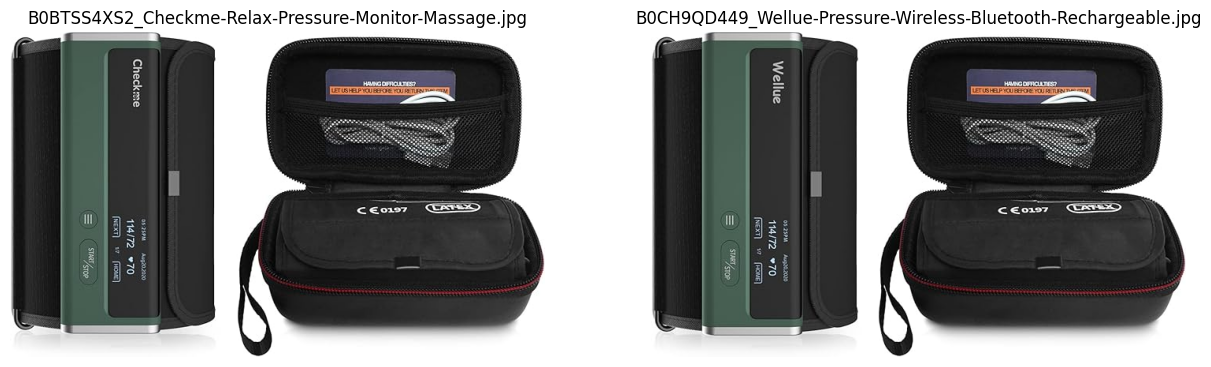

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Function to display example images from a cluster
def display_cluster_images(cluster_number, num_images=5):
    cluster_indices = np.where(cluster2 == cluster_number)[0]

    plt.figure(figsize=(40, 3 * num_images))
    # change the next range to display all images of the cluster
    for i, index in enumerate(cluster_indices[1:3]):
        plt.subplot(1, num_images, i + 1)
        image = cv2.imread(image_paths[index])
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(os.path.basename(image_paths[index]))
        plt.axis('off')

    plt.show()

# Display example images from the first cluster
selected_cluster = 134  # Choose the cluster number you want to display
display_cluster_images(selected_cluster)

In [ ]:
from collections import Counter

# Count occurrences of each cluster 3 label
cluster_counts = Counter(cluster3)

# Print the length of each cluster
for cluster_label, count in cluster_counts.items():
    print(f'Cluster {cluster_label}: {count} images')

Cluster 69: 1 images
Cluster 71: 1 images
Cluster 163: 1 images
Cluster 182: 1 images
Cluster 59: 1 images
Cluster 96: 1 images
Cluster 215: 1 images
Cluster 107: 1 images
Cluster 97: 1 images
Cluster 202: 1 images
Cluster 74: 1 images
Cluster 164: 1 images
Cluster 52: 1 images
Cluster 39: 1 images
Cluster 143: 1 images
Cluster 87: 1 images
Cluster 175: 1 images
Cluster 177: 2 images
Cluster 189: 1 images
Cluster 160: 1 images
Cluster 115: 1 images
Cluster 179: 1 images
Cluster 187: 1 images
Cluster 80: 1 images
Cluster 17: 1 images
Cluster 26: 1 images
Cluster 130: 1 images
Cluster 150: 1 images
Cluster 154: 1 images
Cluster 169: 1 images
Cluster 45: 1 images
Cluster 48: 1 images
Cluster 82: 1 images
Cluster 83: 1 images
Cluster 138: 1 images
Cluster 110: 1 images
Cluster 40: 1 images
Cluster 108: 1 images
Cluster 212: 1 images
Cluster 193: 1 images
Cluster 111: 1 images
Cluster 38: 1 images
Cluster 36: 1 images
Cluster 10: 1 images
Cluster 37: 1 images
Cluster 209: 1 images
Cluster 6

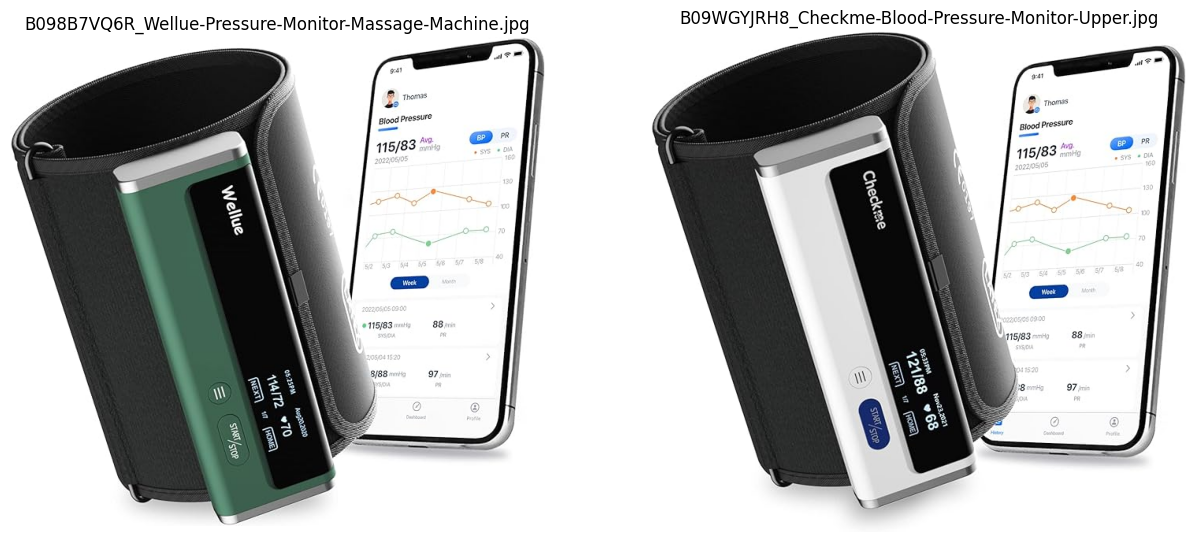

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Function to display example images from a cluster
def display_cluster_images(cluster_number, num_images=5):
    cluster_indices = np.where(cluster3 == cluster_number)[0]

    plt.figure(figsize=(40, 3 * num_images))
    # change the next range to display all images of the cluster
    for i, index in enumerate(cluster_indices[:num_images]):
        plt.subplot(1, num_images, i + 1)
        image = cv2.imread(image_paths[index])
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(os.path.basename(image_paths[index]))
        plt.axis('off')

    plt.show()

# Display example images from the first cluster
#6, 56, 21
selected_cluster = 214 # Choose the cluster number you want to display
display_cluster_images(selected_cluster)